# <div style="background-color:rgba(204, 229, 255, 0.5); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px"><span style="color:rgba(0, 76, 153, 1);">PHYS 121 Pre-Lab #8</span></div>
# Using Tracker

***
## Learning Objectives:
* <b><span style="color:rgba(0, 153, 76, 1);"> Learn how to collect data from a video using Tracker and how to upload and analyze that data in Python.  </span></b>
* <b><span style="color:rgba(0, 153, 76, 1);"> Review the concepts of angular velocity and harmonic motion. </span></b>

***
## Install & Import Required Packages:
Before starting, place your cursor in the code cell below and press 'Shift' + 'Enter'.  If the 'Check()' function reports that "All packages already installed", then proceed by first executing the second code cell that begins with: 
``` python
# Import the required modules.
```

If 'Check()' reports that some new packages have been installed, then go to File$\to$Log Out to complete log out of this notebook.  Then log in and execute the cell below again.

In [ ]:
import installer
installer.Check()

In [2]:
# Import required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import httpimport
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import * 
with httpimport.remote_repo(['data_entry'], 'https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/modules'):
    import data_entry
with httpimport.remote_repo(['PHYS121'], 'https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/modules'):
    import PHYS121

***
## Introduction:

For your 8th and final lab, you will be continuing your investigations of the duality between electricity and magnetism by observing what happens when a magnet slides down a copper plate. You'll be using a free piece of software called **Tracker** in order to quantitatively analyze its motion. Unlike LoggerPro, Tracker is equipped with an **auto-tracker** function - rather than clicking on each and every frame, you will simply set the parameters and hit play. In this Pre-Lab, you will learn how to use Tracker while reviewing the concepts of angular velocity and harmonic motion. 

First, download [this video](https://cmps-people.ok.ubc.ca/jbobowsk/) of a turntable taken from overhead. Now, recall that in the first two labs for Physics 121 we used the small angle approximation to describe the motion of the pendulum as harmonic. No such approximation is necessary here: for uniform circular motion, the $x$ and $y$ components oscillate exactly harmonically, as the gif below demonstrates.

<br>
<p>
<center>
<img src="scanim.gif" width="300"/>
<b>Fig. 1: Demonstration of the harmonic oscillation of the $x$ and $y$ components of an object undergoing uniform circular motion. Adapted from <a href="https://commons.wikimedia.org/wiki/File:Sine_and_cosine_animation.gif">Wikimedia Commons</a>.  </b></center>
</p>



<br>

First, you will need to download and install Tracker from [this link](https://physlets.org/tracker/). The program is free, compatible with Windows, Mac, and Linux, and it doesn't require extensive computational resources to run. If you have any misgivings about downloading the program, you're welcome to try using the [online version](https://physlets.org/tracker/trackerJS/index_ff.html), but we've found this to be buggy and more challenging to use than the desktop version.

<br>

Once you have tracker installed and the video downloaded, follow the procedure below to collect your data.


1. Import the video to Tracker.
<img src="https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/Lab8/prelab/import%20video.gif" width="750"/>
***
2. Calibrate Tracker. 
<img src="https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/Lab8/prelab/set%20calibration.gif" width="750"/>
***
3. Define your x- and y-axes.
<img src="https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/Lab8/prelab/set%20axes.gif" width="750"/>
***
4. Select the video segment to be analyzed so that the turntable begins and ends with the coins aligned along the x-axis.
<img src="https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/Lab8/prelab/set%20start%20and%20stop.gif" width="750"/>
***
5. Collect your data using auto-tracker.
<img src="https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/Lab8/prelab/autotrack.gif" width="750"/>
***
6. Export your data as a .txt file.
<img src="https://cmps-people.ok.ubc.ca/jbobowsk/PHYS_121_Lab/Lab8/prelab/export%20data.gif" width="750"/>

The .read_csv() method in Pandas can also load .txt files with comma-separated data. Use the code provided below to import your data into a DataFrame. Ensure that your .txt file is in the appropriate folder (or provide the full filepath).

In [30]:
df = pd.read_csv("data.txt", 
            header = None, 
            skiprows=3, 
            names=["t","xA", "yA", "xB","yB"]
           )
print(df)

            t        xA        yA         xB        yB
0    0.000000  5.347036 -0.058019  10.970650  0.016112
1    0.033333  5.287089 -0.836308  10.831460 -1.605457
2    0.066667  5.082206 -1.611371  10.459880 -3.182785
3    0.100000  4.787525 -2.327981   9.874049 -4.703561
4    0.133333  4.391958 -3.018668   9.039798 -6.095067
..        ...       ...       ...        ...       ...
123  4.100000  4.419200  3.026211   8.954984  6.359322
124  4.133333  4.826114  2.368460   9.792867  4.963929
125  4.166667  5.129042  1.613597  10.412710  3.454377
126  4.200000  5.302918  0.835199  10.807170  1.870279
127  4.233333  5.356431  0.052990  10.960020  0.246944

[128 rows x 5 columns]


Great! With (hopefully) minimal effort, we find ourselves with a heap of clean data to analyze.



***
**<span style="color:blue">Question 1:</span>**  

The first line in the code cell below generates a plot of $x_A(t)$ and $y_A(t)$. Following this example, generate a second plot with $x_A(t)$ and $x_B(t)$.

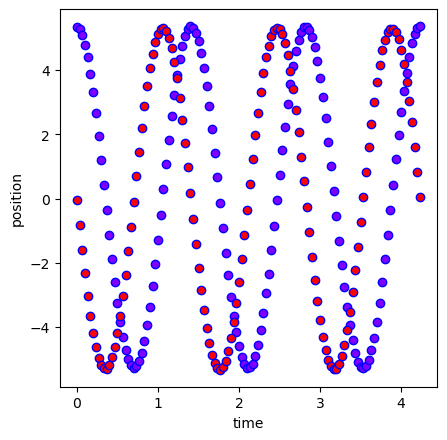

In [14]:
fig = PHYS121.MultiScatter([[df["t"].to_numpy(), df["xA"].to_numpy()], 
                            [df["t"].to_numpy(), df["yA"].to_numpy()]], 
                           xlabel = "time", 
                           ylabel = "position"
                          )

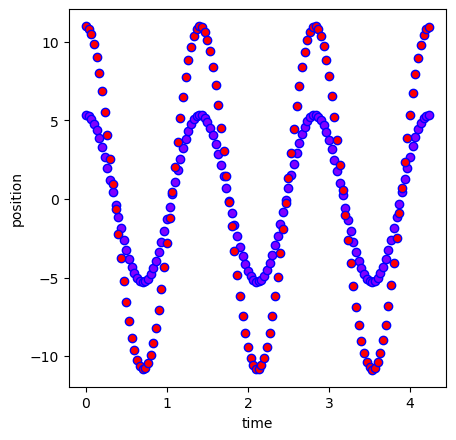

In [5]:
# Create your second plot here

fig = PHYS121.MultiScatter([[df["t"].to_numpy(), df["xA"].to_numpy()], 
                            [df["t"].to_numpy(), df["xB"].to_numpy()]], 
                           xlabel = "time", 
                           ylabel = "position")

**<span style="color:blue">Question 2:</span>**  

Use the data you collected to find the radius of the coins' rotation and assign these values to the variabes "r_A" and "r_B" in the code cell below.

***
**<span style="color:blue">Answer 2:</span>**

[//]: # (Please do not delete this comment or anything above it.  Anything below this comment can be deleted.)  



In [18]:
data = np.transpose(df.to_numpy())


rA = np.average(np.sqrt(data[1]**2 + data[2]**2)) 
rB = np.average(np.sqrt(data[3]**2 + data[4]**2)) 

print(f"rA: {rA} cm \nrB: {rB} cm")


# Alternative:

rAalt = np.sqrt(data[1][0]**2 + data[2][0]**2)
rBalt = np.sqrt(data[3][0]**2 + data[4][0]**2)

print(f"\nrA (alt): {rAalt} cm \nrB (alt): {rBalt} cm")

rA: 5.312007058750082 cm 
rB: 10.909531987471766 cm

rA (alt): 5.347350761819405 cm 
rB (alt): 10.970661831375512 cm


**<span style="color:blue">Question 3:</span>**  

When we have a constant angular velocity $\omega$, we can use the formula

$$ \omega = \frac{\Delta \theta}{\Delta t} $$

where $\Delta \theta$ is the angle (in radians) that the object rotates through over a period of time $\Delta t$. So, if the record makes $N$ full turns over the interval $\Delta t$, we have

$$ \omega = \frac{2 \pi N }{\Delta t} $$

Count how many full rotations the coins made over the entire interval you data for and assign that value to the variable $N$ in the code block below. We have calculated the interval $\Delta t$. Use this variable to calculate $\omega$.


**<span style="color:blue">Answer 3:</span>**  


In [33]:
N = 3
dt = df.iat[-1,0] - df.iat[0,0]

omega = 2*np.pi*N / dt
print(omega)

4.452651355690365


**<span style="color:blue">Question 4:</span>**  

Using your value(s) from above, calculate the tangential velocity of each coin **in units of meters per second**. 


**<span style="color:blue">Answer 4:</span>**  


In [42]:
# Tangential velocities:
vA = omega * rA / 100
vB = omega * rB / 100

print(f"Tangential velocity of coin A: {vA} m/s \nTangential velocity of coin B: {vB} m/s")

Tangential velocity of coin A: 0.23652515431580337 m/s 
Tangential velocity of coin B: 0.48576342393963556 m/s


**Congratulations!** You've just completed the *final* pre-lab of Physics 121! 

If you're interested in seeing an alternative way to analyze the data, you're encouraged to read through the following, but there won't be any more questions beyond this point.

First, since the candles follow circular paths, note that $v_\perp = \sqrt{v_x^2 + v_y^2}$. We know that $v_x$ = $dx/dt$, but we can't take a derivative of a discrete set of data. Instead, we use a finite difference formulation. Given a discrete set of times $t_1, t_2, t_3, \dots$ associated with a discrete set of positions $x_1, x_2, x_3, \dots$. We know that the average velocity over a time preiod $\Delta t$ is given by $\Delta x / \Delta t$, so we can just take the average velocity over each time step and associate that velocity with the start of the time step:

$$ v_x(t_i) = \frac{x_{i+1} - x_i}{t_{i+1} - t_i} $$

If we wanted to be a little more careful, we could associate the velocity above with the midpoint of the time interval:

$$ t_i^\prime = \left(\frac{t_{i+1} + t_i}{2}\right) $$

but this isn't terribly necessary here. Execute the cell below to compute these velocities from your data:

In [43]:
# This line converts the DataFrame to an array
data = np.transpose(df.to_numpy())

# This function returns an array of the difference of adjacent elements in a given array
def Delta(arr):
    rng = np.arange(0, len(arr) - 1)
    return np.array([ arr[l+1] - arr[l] for l in rng ])

# We use this function to create arrays of the approximate velocity of the candles over the provided intervals
Dt = Delta(data[0])

vel_xA = Delta(data[1]) / Dt
vel_yA = Delta(data[2]) / Dt
vel_xB = Delta(data[3]) / Dt
vel_yB = Delta(data[4]) / Dt

*** 

Plotting these, we see a few expected features:

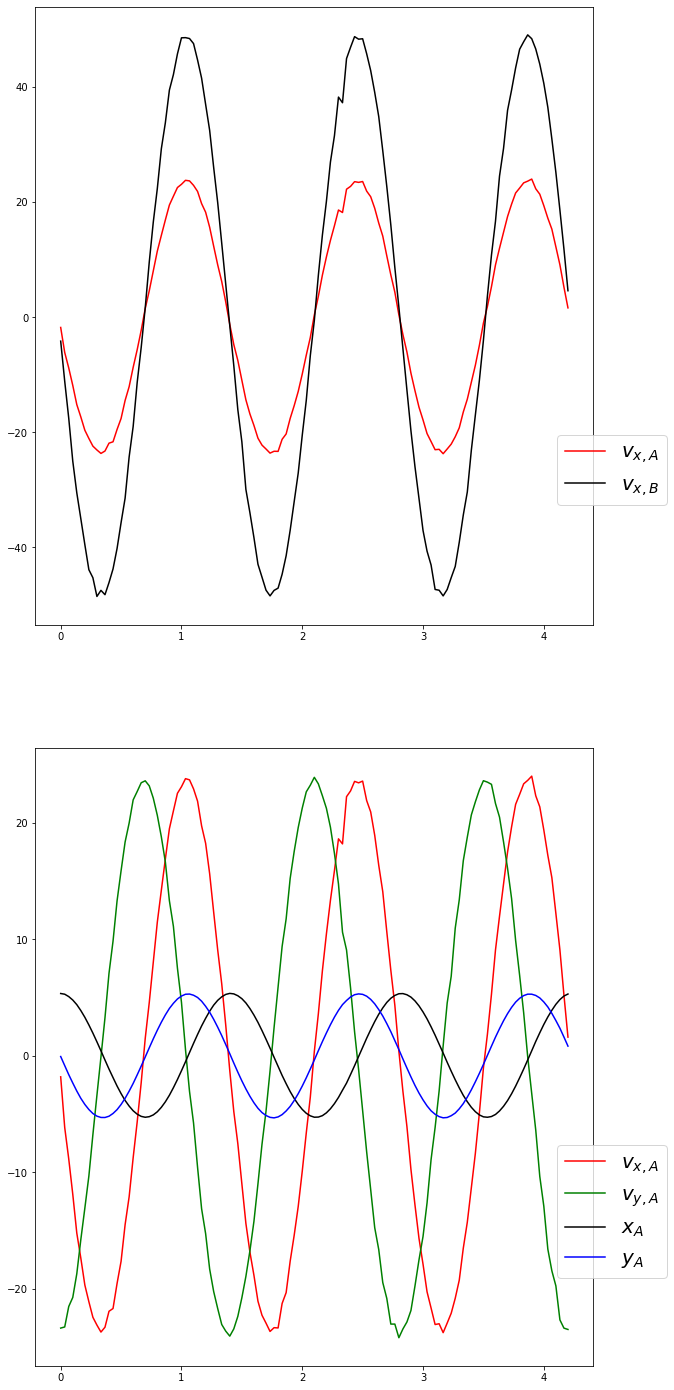

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(10, 25))
axs[0].plot(data[0][:-1], vel_xA, label = "$v_{x,A}$", color = "red")
axs[0].plot(data[0][:-1], vel_xB, label = "$v_{x,B}$", color = "black")
axs[0].legend(loc='right', bbox_to_anchor=(0.75, 0., 0.4, 0.5), prop={'size': 20})
axs[1].plot(data[0][:-1], vel_xA, label = "$v_{x,A}$", color = "red")
axs[1].plot(data[0][:-1], vel_yA, label = "$v_{y,A}$", color = "green")
axs[1].plot(data[0][:-1], data[1][:-1], label = "$x_A$", color = "black")
axs[1].plot(data[0][:-1], data[2][:-1], label = "$y_A$", color = "blue")
axs[1].legend(loc='right', bbox_to_anchor=(0.75, 0., 0.4, 0.5), prop={'size': 20})

To get an approximation of the velocity, we'll calculate $\sqrt{v_x^2 + v_y^2}$ for each time interval and take the average:

In [46]:
vTA = np.average(np.sqrt( vel_xA**2 + vel_yA**2 )) / 100
vTB = np.average(np.sqrt( vel_xB**2 + vel_yB**2 )) / 100

print(f"Tangential velocity of object A: {vTA} m/s \nTangential velocity of object B: {vTB} m/s")

Tangential velocity of object A: 0.23604913482982187 m/s 
Tangential velocity of object B: 0.48478362336945535 m/s
